In [77]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
from lazypredict.Supervised import LazyClassifier
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [78]:
df = pd.read_csv("train.csv")

In [79]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.00,NaN,360.00,1.00,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.00,128.00,360.00,1.00,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.00,66.00,360.00,1.00,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.00,120.00,360.00,1.00,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.00,141.00,360.00,1.00,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.00,267.00,360.00,1.00,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.00,95.00,360.00,1.00,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.00,158.00,360.00,0.00,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.00,168.00,360.00,1.00,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.00,349.00,360.00,1.00,Semiurban,N


In [80]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [81]:
df["Credit_History"].value_counts()

Credit_History
1.00    475
0.00     89
Name: count, dtype: int64

In [82]:
df.drop("Loan_ID",axis=1 , inplace=True)
df.index[df["Gender"] == "Female"]

Index([ 17,  29,  37,  45,  48,  49,  50,  51,  52,  54,
       ...
       556, 559, 561, 568, 582, 587, 600, 604, 609, 613],
      dtype='int64', length=112)

In [83]:
NaNs_Gender = df["Gender"].value_counts().index[1]
NaNs_Credit_History = df["Credit_History"].value_counts().index[1]
NaNs_LoanAmount = df["LoanAmount"].value_counts().mean()
NaNs_Loan_Amount_Term = df["Loan_Amount_Term"].value_counts().median()

In [84]:
#Filling NaN values
df["Gender"].fillna(NaNs_Gender , inplace=True)
df["Credit_History"].fillna(NaNs_Credit_History , inplace=True)
df["LoanAmount"].fillna(NaNs_LoanAmount , inplace=True)
df["Loan_Amount_Term"].fillna(NaNs_Loan_Amount_Term , inplace=True)

In [85]:
y_tmp = df["Loan_Status"]
Loan_Status_Binary = []
for item in y_tmp:
    if item == "Y":
        Loan_Status_Binary.append(1)
    elif item == "N":
        Loan_Status_Binary.append(0)
df["Loan_Status"] = Loan_Status_Binary

In [86]:
Dependent = []
random = np.random.randint(3,6)
for Dep in df["Dependents"]:
    if Dep == "0":
        Dependent.append(0)
    elif Dep == "1":
        Dependent.append(1)
    elif Dep == "2":
        Dependent.append(2)
    else:
        Dependent.append(3)
df["Dependents"] = Dependent 

In [87]:
df["Credit_History"] = df["Credit_History"].astype("int")

In [88]:
drops = ["Property_Area"]
df.drop(drops , axis=1 , inplace=True)
df = pd.get_dummies(df , drop_first=True)

In [89]:
# True == 1 , False == 0
columns = df.columns[5::]
df[columns] = df[columns].applymap(lambda x : 1 if x == True else 0)

In [90]:
df

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes
0,0,5849,0.00,2.92,360.00,1,1,1,0,0,0
1,1,4583,1508.00,128.00,360.00,1,0,1,1,0,0
2,0,3000,0.00,66.00,360.00,1,1,1,1,0,1
3,0,2583,2358.00,120.00,360.00,1,1,1,1,1,0
4,0,6000,0.00,141.00,360.00,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.00,71.00,360.00,1,1,0,0,0,0
610,3,4106,0.00,40.00,180.00,1,1,1,1,0,0
611,1,8072,240.00,253.00,360.00,1,1,1,1,0,0
612,2,7583,0.00,187.00,360.00,1,1,1,1,0,0


In [91]:
#renaming independent variables names
w = df.drop("Loan_Status",axis=1).columns[5::]
q = ["Gender","Married","Education","Self_Employed","Credit_History"]

In [92]:
if len(w) == len(q):
    rename_dict = dict(zip(w,q))
    df = df.rename(columns=rename_dict)

In [93]:
df

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender,Loan_Status,Married,Education,Self_Employed,Credit_History
0,0,5849,0.00,2.92,360.00,1,1,1,0,0,0
1,1,4583,1508.00,128.00,360.00,1,0,1,1,0,0
2,0,3000,0.00,66.00,360.00,1,1,1,1,0,1
3,0,2583,2358.00,120.00,360.00,1,1,1,1,1,0
4,0,6000,0.00,141.00,360.00,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.00,71.00,360.00,1,1,0,0,0,0
610,3,4106,0.00,40.00,180.00,1,1,1,1,0,0
611,1,8072,240.00,253.00,360.00,1,1,1,1,0,0
612,2,7583,0.00,187.00,360.00,1,1,1,1,0,0


In [94]:
df.isnull().sum()

Dependents           0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Gender               0
Loan_Status          0
Married              0
Education            0
Self_Employed        0
Credit_History       0
dtype: int64

In [169]:
x = df.drop("Loan_Status",axis=1)
y = df["Loan_Status"]

In [170]:
# 70% of the featues size for training and the rest for test
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.3)

In [171]:
#Standardizing
scaler_minmax = MinMaxScaler()
x_train_scaled_minmax = scaler_minmax.fit_transform(x_train)
x_test_scaled_minmax = scaler_minmax.transform(x_test)

In [172]:
#Defining prediction algorithms
model1 = RandomForestClassifier()
model2 = LogisticRegression()
clf = LazyClassifier()

In [173]:
model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
models = clf.fit(x_train,x_test,y_train,y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.07it/s]

[LightGBM] [Info] Number of positive: 285, number of negative: 144
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000074 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 351
[LightGBM] [Info] Number of data points in the train set: 429, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.664336 -> initscore=0.682676
[LightGBM] [Info] Start training from score 0.682676
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

In [174]:
print(models)

(                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
GaussianNB                         0.75               0.64     0.64      0.74   
LinearSVC                          0.77               0.63     0.63      0.75   
LinearDiscriminantAnalysis         0.77               0.63     0.63      0.75   
BernoulliNB                        0.77               0.63     0.63      0.75   
CalibratedClassifierCV             0.77               0.63     0.63      0.75   
RidgeClassifierCV                  0.77               0.63     0.63      0.75   
RidgeClassifier                    0.77               0.63     0.63      0.75   
NearestCentroid                    0.77               0.63     0.63      0.75   
LogisticRegression                 0.77               0.63     0.63      0.75   
AdaBoostClassifier                 0.76               0.63     0.63      0.74   
QuadraticDiscriminantAnalys

In [175]:
example = x.iloc[0:200]
prediction = model1.predict(example)
y_pred = model1.predict(x_test)
y_pred_log = model2.predict(x_test)

In [176]:
accuracy_model1 = accuracy_score(y_test,y_pred)
recall_model1 = recall_score(y_test,y_pred)
precision_model1 = precision_score(y_test,y_pred)
print(f"RandomForestClassifier Accuracy : {accuracy_model1} \n")
print(f"RandomForestClassifier Recall : {recall_model1} \n")
print(f"RandomForestClassifier Precision : {precision_model1} \n")

RandomForestClassifier Accuracy : 0.745945945945946 

RandomForestClassifier Recall : 0.8759124087591241 

RandomForestClassifier Precision : 0.8 



In [177]:
accuracy_model2 = accuracy_score(y_test,y_pred_log)
recall_model2 = recall_score(y_test,y_pred_log)
precision_model2 = precision_score(y_test,y_pred_log)
print(f"LogisticRegression Accuracy : {accuracy_model2} \n")
print(f"LogisticRegression Recall : {recall_model2} \n")
print(f"LogisticRegression Precision : {precision_model2} \n")

LogisticRegression Accuracy : 0.7675675675675676 

LogisticRegression Recall : 0.9124087591240876 

LogisticRegression Precision : 0.8012820512820513 



In [178]:
df1 = pd.DataFrame(prediction)
df1 = df1.rename(columns={0:"Predict"})
df1["Actual"] = y

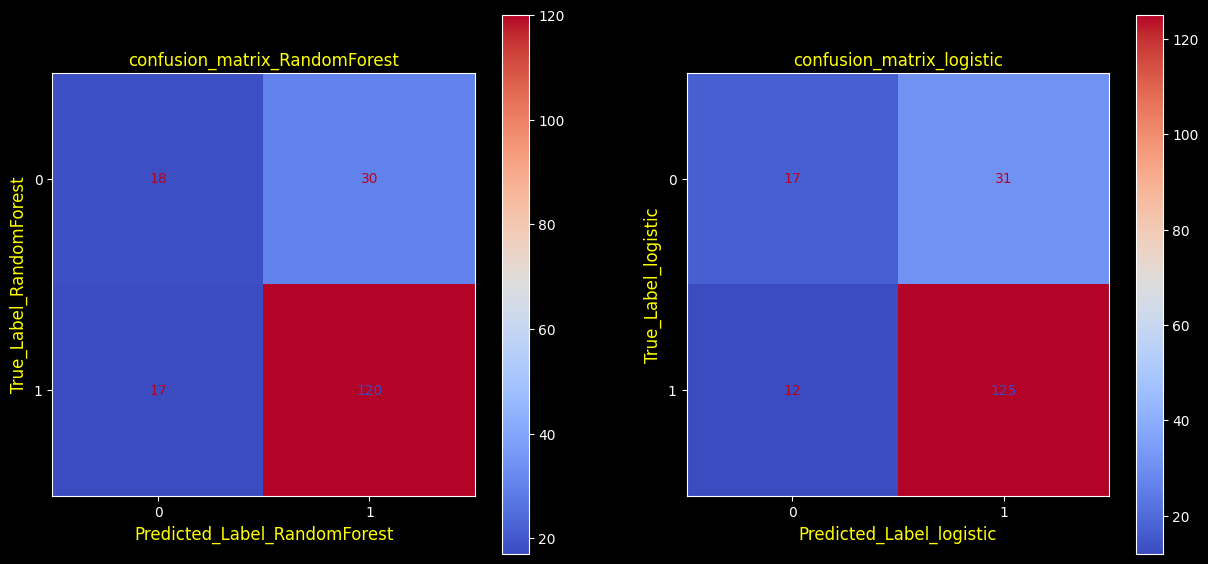

In [179]:
#Drawing Confusion-Matrix
plt.style.use("dark_background")
fig , axes = plt.subplots(ncols=2 , nrows=1 , figsize=(15,7))
cm = confusion_matrix(y_test,y_pred)
confusion_display = ConfusionMatrixDisplay(confusion_matrix=cm)
confusion_display.plot(ax=axes[0],cmap=plt.cm.coolwarm)
axes[0].set_title("confusion_matrix_RandomForest" , color="yellow" , size=12)
axes[0].set_xlabel("Predicted_Label_RandomForest" , color="yellow" , size=12)
axes[0].set_ylabel("True_Label_RandomForest" , color="yellow" , size=12)

cm1 = confusion_matrix(y_test,y_pred_log)
confusion_display1 = ConfusionMatrixDisplay(confusion_matrix=cm1)
confusion_display1.plot(ax=axes[1],cmap=plt.cm.coolwarm)
axes[1].set_title("confusion_matrix_logistic" , color="yellow" , size=12)
axes[1].set_xlabel("Predicted_Label_logistic" , color="yellow" , size=12)
axes[1].set_ylabel("True_Label_logistic" , color="yellow" , size=12)


TN_R, FP_R, FN_R, TP_R = cm.ravel()
TN_L, FP_L, FN_L, TP_L = cm1.ravel()
plt.show()

In [180]:
print(f"True-Negative_RandomForest (TN_R) : {TN_R} \n True-Positive_RandomForest (TP_R) : {TP_R}")
print(f"False-Negative_RandomForest (FN_R) : {FN_R} \n False-Positive_RandomForest (FP_R) : {FP_R}")

True-Negative_RandomForest (TN_R) : 18 
 True-Positive_RandomForest (TP_R) : 120
False-Negative_RandomForest (FN_R) : 17 
 False-Positive_RandomForest (FP_R) : 30


In [181]:
print(f"True-Negative_Logistic (TN_L) : {TN_L} \n True-Positive_Logistic (TP_L) : {TP_L}")
print(f"False-Negative_Logistic (FN_L) : {FN_L} \n False-Positive_Logistic (FP_L) : {FP_L}")

True-Negative_Logistic (TN_L) : 17 
 True-Positive_Logistic (TP_L) : 125
False-Negative_Logistic (FN_L) : 12 
 False-Positive_Logistic (FP_L) : 31


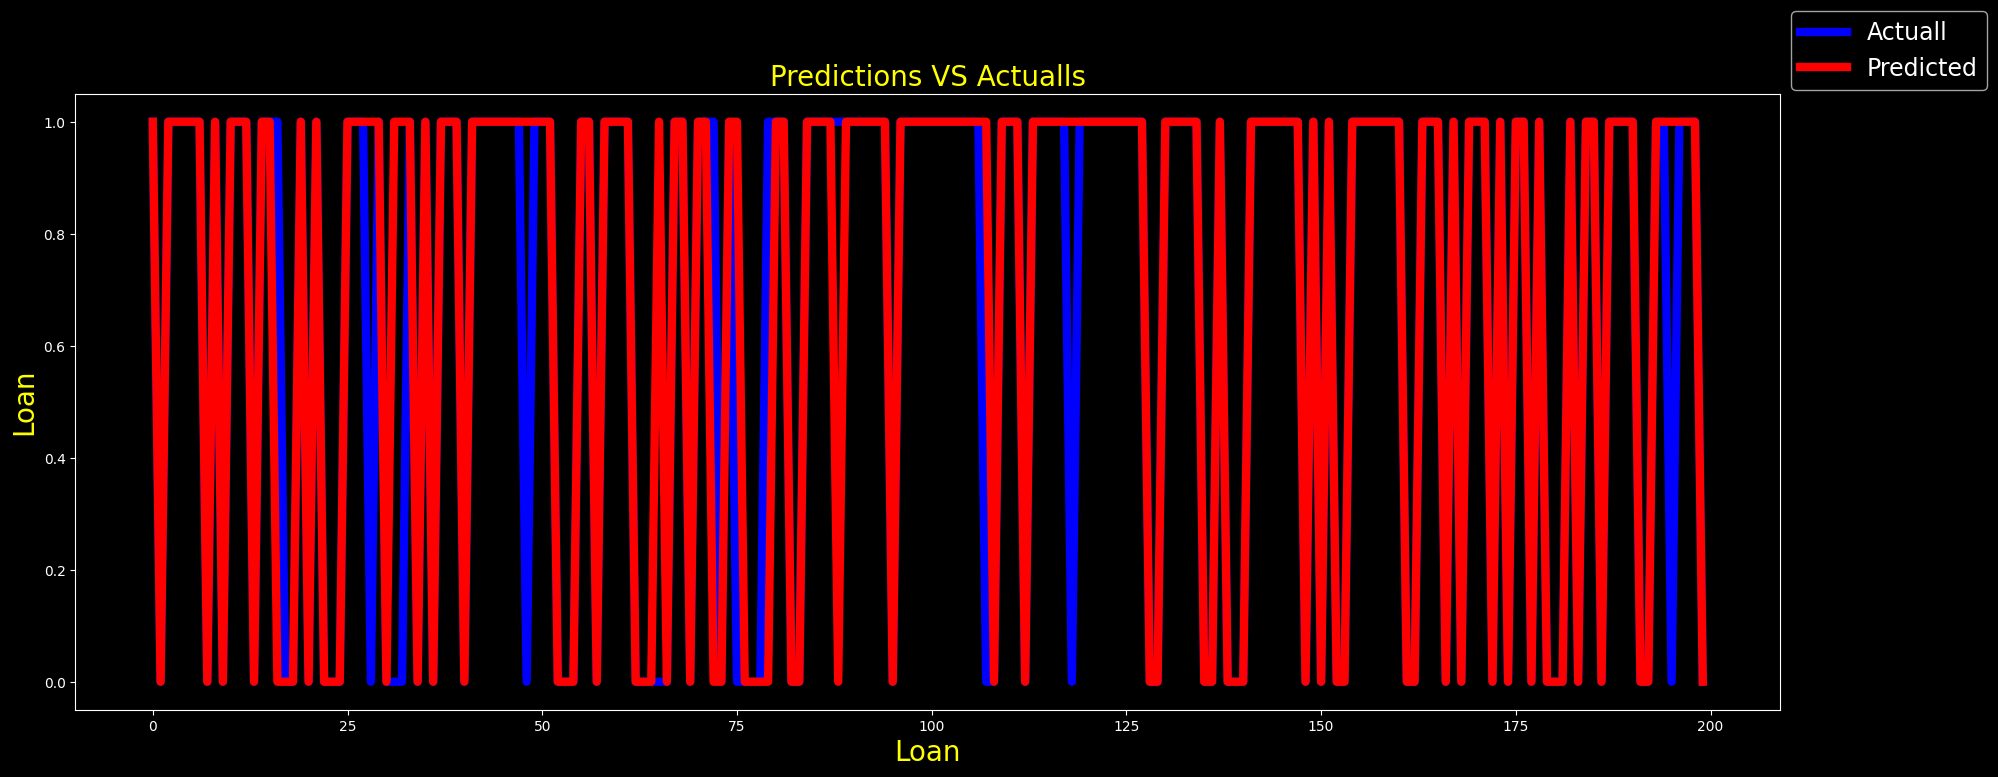

In [182]:
#Random Forest prediction history for first 200 rows
fig , ax1 = plt.subplots(ncols=1 , nrows=1 , figsize=(22,8))
ax1.plot(df1["Actual"] , color="blue" , label="Actuall" , linewidth=6)
ax1.plot(df1["Predict"] , color="red" , label="Predicted" , linewidth=6)
fig.legend(prop={"size":17})
ax1.set_title("Predictions VS Actualls" , size=20 , color="yellow")
ax1.set_xlabel("Loan" , size=20 , color="yellow")
ax1.set_ylabel("Loan" , size=20 , color="yellow")
plt.show()

In [183]:
df["Dependents"].value_counts()

Dependents
0    345
1    102
2    101
3     66
Name: count, dtype: int64

In [184]:
df["Credit_History"].value_counts()

Credit_History
0    532
1     82
Name: count, dtype: int64

In [185]:
df2 = df.corr()

In [186]:
def colorize(row):
    if row == 1:
        return "background-color : red"
    elif row > 0.5 or row < -0.5:
        return "background-color : yellow"
    else:
        return "background-color : grey"

In [187]:
df2 = df2.style.applymap(colorize)

In [188]:
df2

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender,Loan_Status,Married,Education,Self_Employed,Credit_History
Dependents,1.000000,0.110073,0.016073,0.125669,-0.036606,-0.034355,-0.003391,0.141975,0.307667,0.061179,0.054023
ApplicantIncome,0.110073,1.000000,-0.116605,0.539297,-0.015948,0.006986,-0.004710,0.013933,0.050194,-0.140760,0.127180
CoapplicantIncome,0.016073,-0.116605,1.000000,0.190502,-0.050506,-0.058795,-0.059187,0.082316,0.080496,-0.062290,-0.016100
LoanAmount,0.125669,0.539297,0.190502,1.000000,0.058635,-0.032775,-0.011130,0.051835,0.140257,-0.173282,0.109369
Loan_Amount_Term,-0.036606,-0.015948,-0.050506,0.058635,1.000000,0.049833,0.007060,-0.052712,-0.080300,-0.108782,-0.029287
Gender,-0.034355,0.006986,-0.058795,-0.032775,0.049833,1.000000,0.432616,0.035780,-0.023626,-0.081637,-0.004994
Loan_Status,-0.003391,-0.004710,-0.059187,-0.011130,0.007060,0.432616,1.000000,0.025407,0.084281,-0.085884,-0.003700
Married,0.141975,0.013933,0.082316,0.051835,-0.052712,0.035780,0.025407,1.000000,0.339026,0.061497,-0.027421
Education,0.307667,0.050194,0.080496,0.140257,-0.080300,-0.023626,0.084281,0.339026,1.000000,0.017671,0.008491
Self_Employed,0.061179,-0.140760,-0.062290,-0.173282,-0.108782,-0.081637,-0.085884,0.061497,0.017671,1.000000,-0.010383
